0.6012024048096193 2.9154518950437307


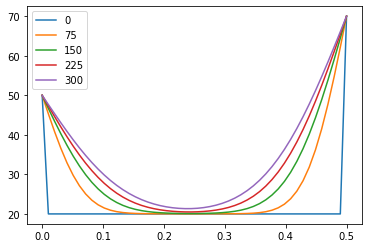

In [1]:
#1D нестационар явный ГУ-1
import numpy as np
import matplotlib.pyplot as plt

T1 = 50
T2 = 70
Tinit = 20
L = 0.5
t = 5*60 

M = 50 
N = 500 

lamda = 50
ro = 7000
c  = 400
qv = 1000
a = lamda/(c*ro)

dx = L/(M-1)
dt = t/(N-1)

tau = a*dt/(dx**2)

dtcrit = dx**2/(2*a)
print(dt, dtcrit)

T = np.zeros((N,M))

T[0,:] = Tinit
T[:,0] = T1
T[:,M-1] = T2

for i in range(N-1):
    for m in range(1,M-1):
        T[i+1,m] = tau*(T[i,m-1]+T[i,m+1]) + (1-2*tau)*T[i,m] + tau*qv*dx**2/lamda

X = [i*dx for i in range(M)]
plt.plot(X,T[0,:], label = round(0*dt))
plt.plot(X,T[int(0.25*(N-1)),:], label = round(int(0.25*(N-1))*dt))
plt.plot(X,T[int(0.5*(N-1)),:], label = round(int(0.5*(N-1))*dt))
plt.plot(X,T[int(0.75*(N-1)),:], label = round(int(0.75*(N-1))*dt))
plt.plot(X,T[N-1,:], label = round((N-1)*dt))
plt.legend()
plt.show()

0.060012002400480095 2.888920988010977


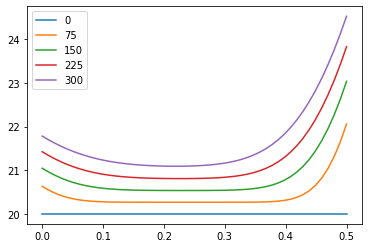

In [2]:
#1D нестационар явный ГУ-3
import numpy as np
import matplotlib.pyplot as plt

# T1 = 50
Tf1 = 50
alpha1 = 15

Tf2 = 70
alpha2 = 45

Tinit = 20
L = 0.5
t = 5*60

M = 50
N = 5000

lamda = 50
ro = 7000
c  = 400
qv = 10000
a = lamda/(c*ro)

dx = L/(M-1)
dt = t/(N-1)

tau = a*dt/(dx**2)

# dtcrit = dx**2/(2*a*(1+(alpha2*dx/lamda)))
dtcrit = dx**2/(2*a*(1+(max(alpha1,alpha2)*dx/lamda)))
print(dt, dtcrit)

T = np.zeros((N,M))

T[0,:] = Tinit
# T[:,0] = T1

for i in range(N-1):
    for m in range(1,M-1):
        T[i+1,m] = tau*(T[i,m-1]+T[i,m+1]) + (1-2*tau)*T[i,m] + tau*qv*dx**2/lamda
    T[i+1,M-1] = (1-2*tau-2*tau*alpha2*dx/lamda)*T[i,M-1] + tau*(2*T[i,M-2]+(2*alpha2*dx*Tf2/lamda)+(qv*dx**2/lamda))
    T[i+1,0] = (1-2*tau-2*tau*alpha1*dx/lamda)*T[i,0] + tau*(2*T[i,1]+(2*alpha1*dx*Tf1/lamda)+(qv*dx**2/lamda))

X = [i*dx for i in range(M)]
plt.plot(X,T[0,:], label = round(0*dt))
plt.plot(X,T[int(0.25*(N-1)),:], label = round(int(0.25*(N-1))*dt))
plt.plot(X,T[int(0.5*(N-1)),:], label = round(int(0.5*(N-1))*dt))
plt.plot(X,T[int(0.75*(N-1)),:], label = round(int(0.75*(N-1))*dt))
plt.plot(X,T[N-1,:], label = round((N-1)*dt))
plt.legend()
plt.show()